Ensure the folloing are installed:  
`pip install openpyxl`

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

<b>Data Extraction</b>

In [2]:
# Reading yield data
df_yield_raw = pd.read_excel(r'C:\\Users\\Trevor\\Documents\\GitHub\\PaletteCohort7\\final_project\\data\\rm_mb_yield_2004_2023.xlsx')
df_precipitation_raw = pd.read_csv(r'C:\\Users\\Trevor\\Documents\\GitHub\\PaletteCohort7\\final_project\\data\\july_2023_precip_sum.csv')

# Reading Shapely
gdf_rm = gpd.read_file(r'C:\\Users\\Trevor\\Documents\\GitHub\\PaletteCohort7\\final_project\\data\\MUNICIPALITY.geojson')

<b>GeoJSON View </b>  
View the basic geoJSON file to outline the expected municipalities and get information on the map we can add data to.  
183 Municipalities, including <b>MUNI_NAME</b> and required <b>geometry</b> for geoJSON

In [3]:
gdf_rm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   OBJECTID                  183 non-null    int32   
 1   MUNI_NO                   183 non-null    int32   
 2   MUNI_NAME                 183 non-null    object  
 3   MUNI_TYPE                 183 non-null    object  
 4   MUNI_LIST_NAME            183 non-null    object  
 5   MUNI_LIST_NAME_WITH_TYPE  183 non-null    object  
 6   geometry                  183 non-null    geometry
dtypes: geometry(1), int32(2), object(4)
memory usage: 8.7+ KB


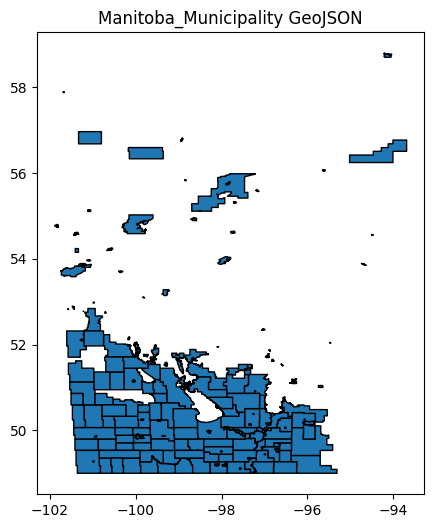

In [4]:
title_text="Manitoba_Municipality GeoJSON"
# Show the basic data in the GeoJSON for reference
axis = gdf_rm.plot(legend=True, aspect=1, edgecolor='black', figsize=(10, 6)
                  ).set_title(title_text)

plt.savefig(fname="manitoba_municipality_geojson.jpg")
plt.show()

Now look at <b>precipitation data</b> for 2023  

In [5]:
df_precipitation_raw.head(3)

,Matched_RM,Period,Year,precip
0,SPRINGFIELD,Jul2023,2023,52.032609
1,ARGYLE,Jul2023,2023,27.387097
2,ROLAND,Jul2023,2023,33.100000


Add precipitation data to the geoJSON to see how easily the two datasets match.  


In [6]:
# Looking at missing values
#df_yield_raw.isna().sum().plot(kind='barh', color='green')

#rename column for merge, remove any spaces from names
# name_match_listA = a["MUNI_LIST_NAME"].str.replace("ST ", "").str.replace(" ", "").str.replace("-", "")
df_precipitation_raw['Matched_RM'] = df_precipitation_raw['Matched_RM'].str.replace("ST ", "").str.replace(" ", "").str.replace("-", "")
df_yield_raw['Matched_RM'] = df_yield_raw['Risk Area / R.M.'].str.replace("ST ", "").str.replace(" ", "").str.replace("-", "")
gdf_rm['Matched_RM'] = gdf_rm['MUNI_LIST_NAME'].str.replace("ST ", "").str.replace(" ", "").str.replace("-", "")

merged_data_frame = pd.merge(gdf_rm, df_precipitation_raw, on='Matched_RM', how='left')
title_text = "Manitoba_Municipality_Rainfall_2023"
a = merged_data_frame[merged_data_frame['precip'].isnull()]

# for areas with no data, add least amount, so they are at least shown
merged_data_frame.fillna(0.0000, inplace=True)

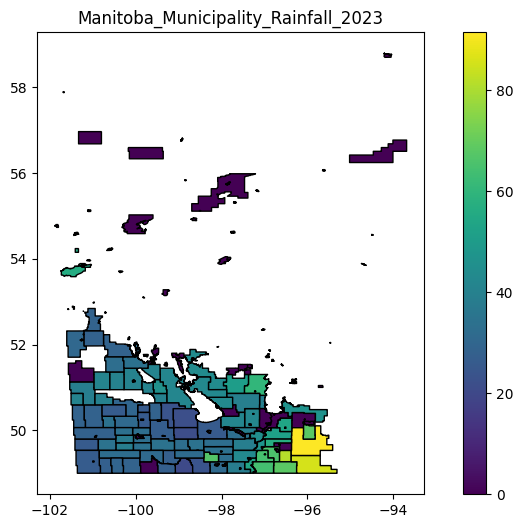

In [7]:
axis = merged_data_frame.plot(column='precip', 
                              legend=True, 
                              #title= title_text,
                              aspect=1, 
                              edgecolor='black', 
                              figsize=(10, 6)
                              ).set_title(title_text)
plt.savefig(fname="manitoba_municipality_rainfall_2023.jpg")
plt.show()

In [8]:
# Show data
gdf_rm.head(3)
gdf_rm.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   OBJECTID                  183 non-null    int32   
 1   MUNI_NO                   183 non-null    int32   
 2   MUNI_NAME                 183 non-null    object  
 3   MUNI_TYPE                 183 non-null    object  
 4   MUNI_LIST_NAME            183 non-null    object  
 5   MUNI_LIST_NAME_WITH_TYPE  183 non-null    object  
 6   geometry                  183 non-null    geometry
 7   Matched_RM                183 non-null    object  
dtypes: geometry(1), int32(2), object(5)
memory usage: 10.1+ KB


max_yield_value 2.796
year_yield_value 1.188


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


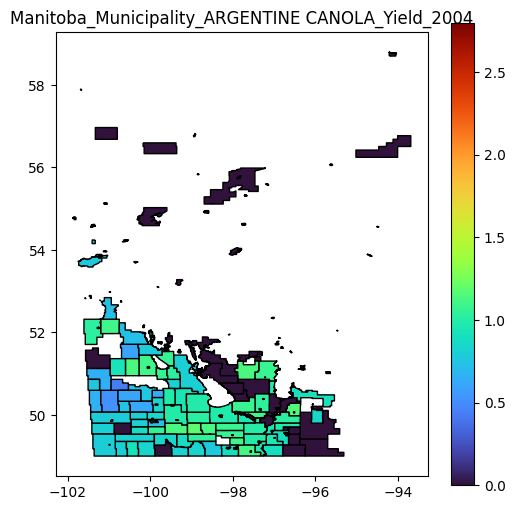

year_yield_value 1.169


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


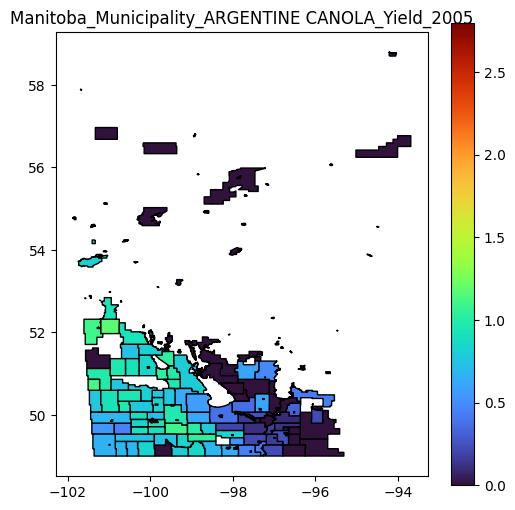

year_yield_value 1.134


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


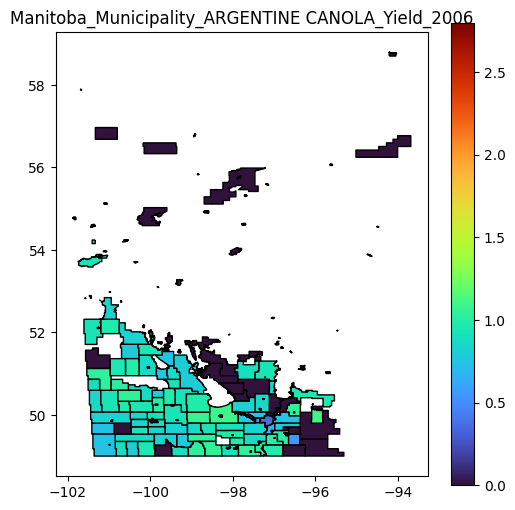

year_yield_value 1.018


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


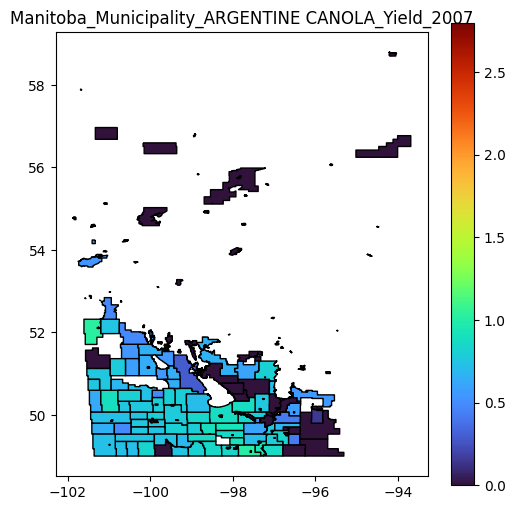

year_yield_value 1.264


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


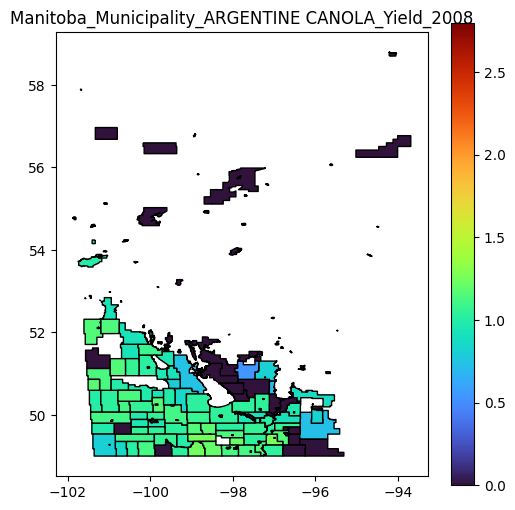

year_yield_value 1.337
     OBJECTID  MUNI_NO                          MUNI_NAME           MUNI_TYPE  \
0           1      189                  RM OF SPRINGFIELD                  RM   
1           1      189                  RM OF SPRINGFIELD                  RM   
2           1      189                  RM OF SPRINGFIELD                  RM   
3           1      189                  RM OF SPRINGFIELD                  RM   
4           1      189                  RM OF SPRINGFIELD                  RM   
..        ...      ...                                ...                 ...   
967       179      357        VILLAGE OF ST. PIERRE-JOLYS             VILLAGE   
968       180      710  NORWAY HOUSE-NORTHERN AFFAIRS ACT  NORTHERN COMMUNITY   
969       181      712    PIKWITONEI-NORTHERN AFFAIRS ACT  NORTHERN COMMUNITY   
970       182      730    ROCK RIDGE-NORTHERN AFFAIRS ACT  NORTHERN COMMUNITY   
971       183      787    MOOSE LAKE-NORTHERN AFFAIRS ACT  NORTHERN COMMUNITY   

    

C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


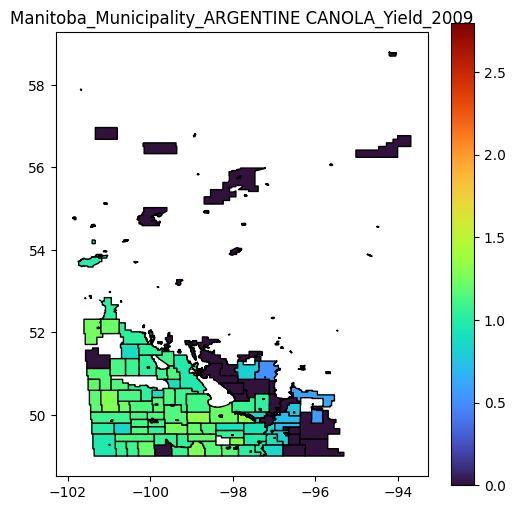

year_yield_value 1.284


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


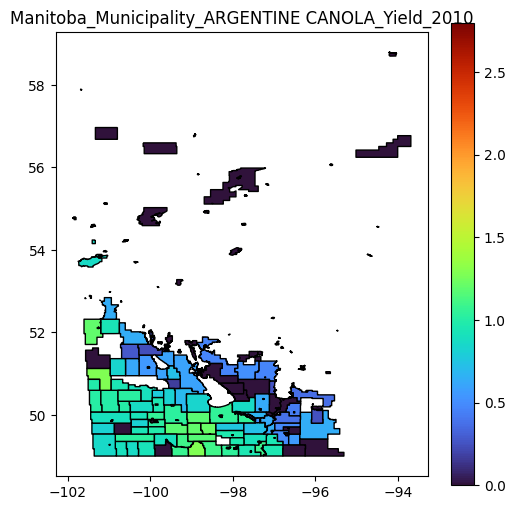

year_yield_value 1.153


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


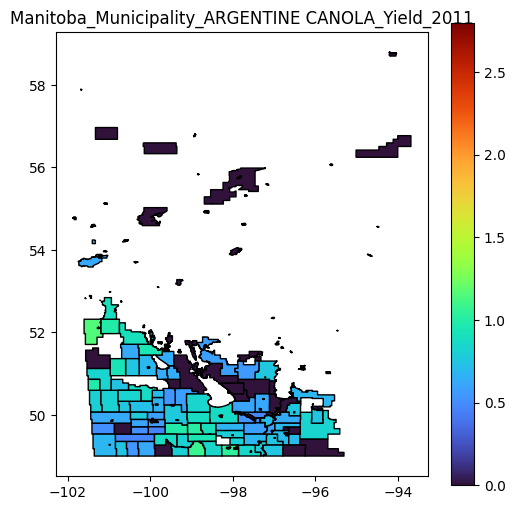

year_yield_value 0.914


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


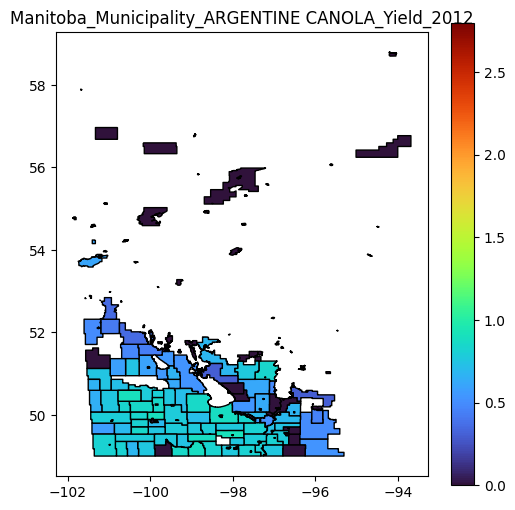

year_yield_value 1.328


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


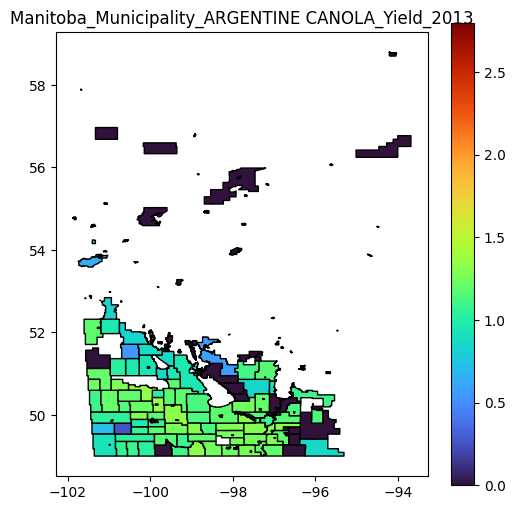

year_yield_value 1.353


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


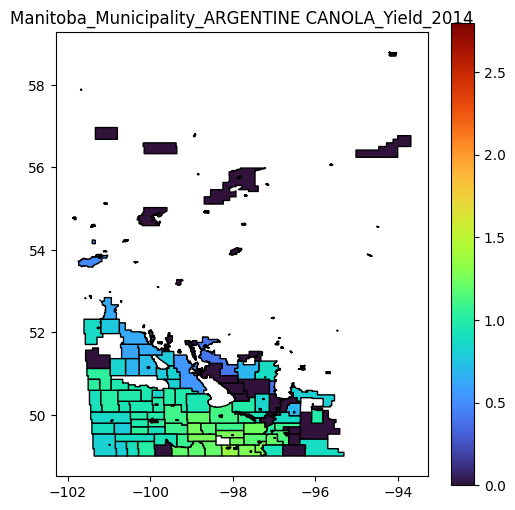

year_yield_value 1.366


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


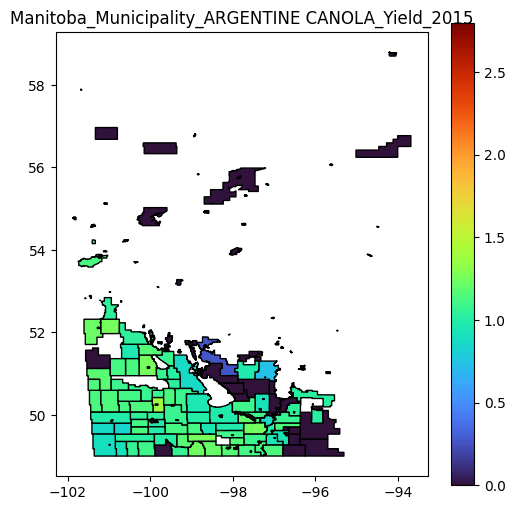

year_yield_value 1.321


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


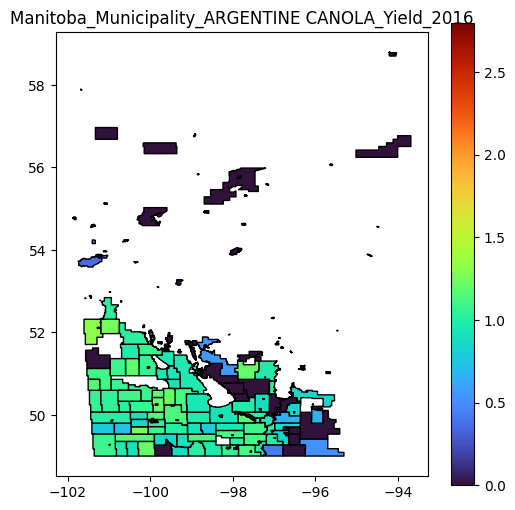

year_yield_value 1.446


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


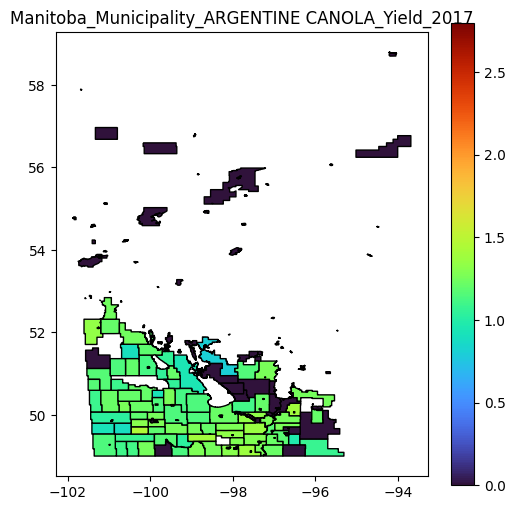

year_yield_value 1.356


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


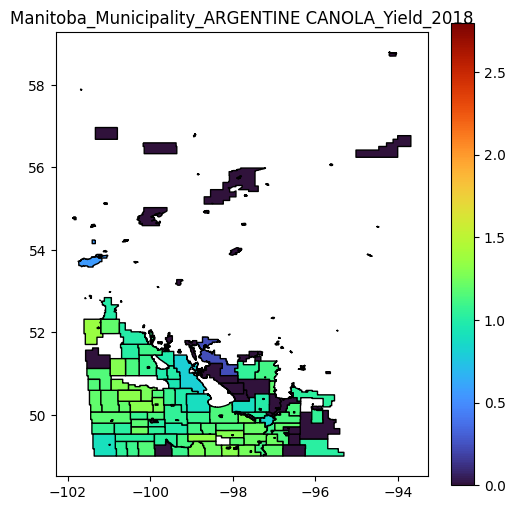

year_yield_value 1.322


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


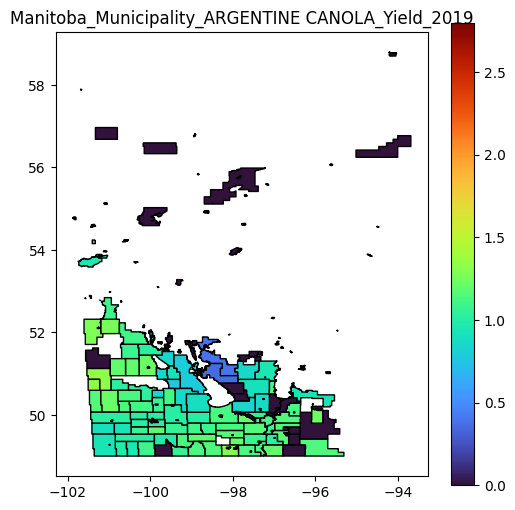

year_yield_value 1.36


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


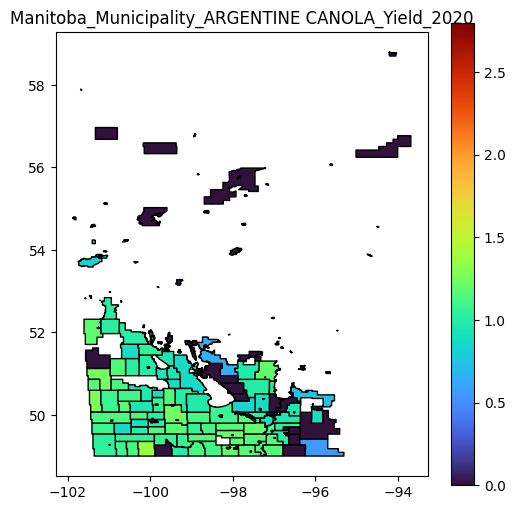

year_yield_value 1.237


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


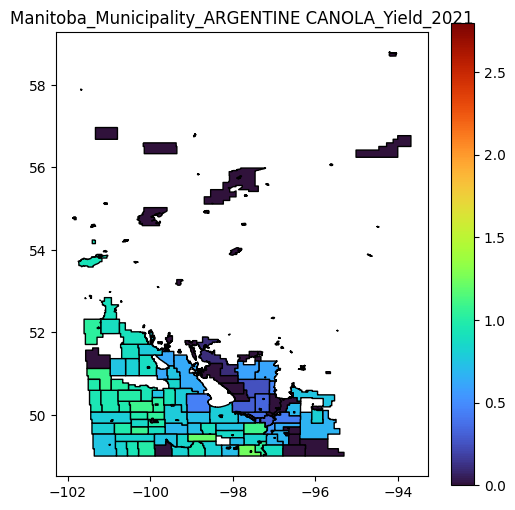

year_yield_value 2.796


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


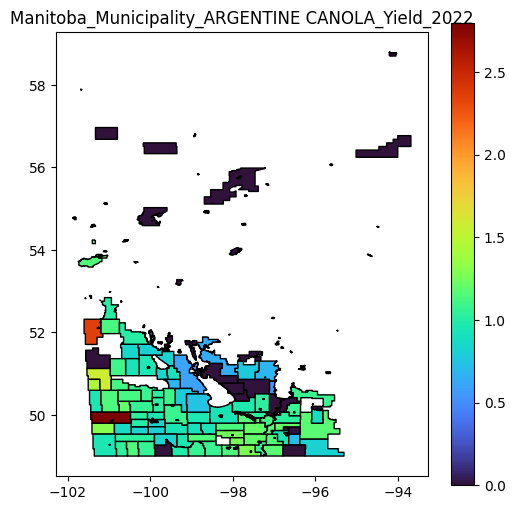

year_yield_value 1.439


C:\Users\Trevor\AppData\Local\Temp\ipykernel_33152\1720185751.py:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry


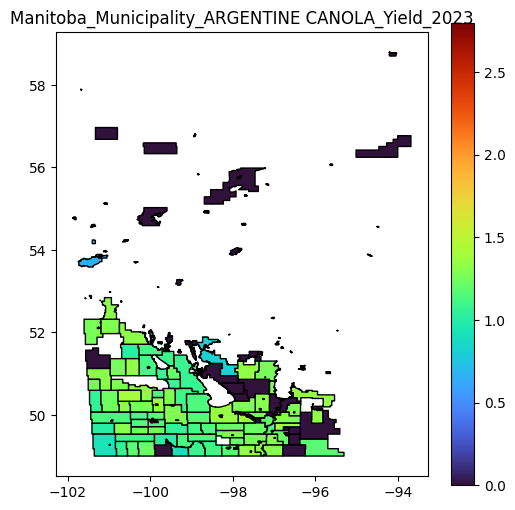

In [212]:
# Show yield data
year_value = 2010
#crop_name = 'ARGENTINE CANOLA' 'OATS' 'FIELD PEAS'
crop_name ='ARGENTINE CANOLA'
df_yield_raw['Yield'] = df_yield_raw['Yield/acre(Metric)'].str.replace(' Tonnes','').str.replace('Tolerance', "0.0").astype('float')
df_yield_raw_1 = df_yield_raw.drop(columns=['Variety', 'Yield/acre(Metric).1',
                                            'Yield/acre(Imperial).1', 
                                            'Yield/acre(Imperial)', 
                                            'Risk Area / R.M.'])

df_yield_raw_1["Acreage"] = df_yield_raw_1["Acres"].str.replace(",", "").str.replace('Minimum', "0.0").astype('float')
# filter out zero acres
#df_yield_raw_1 = df_yield_raw_1.loc[df_yield_raw_1['Acres']! = 0.0]
df_yield_raw_1 = df_yield_raw_1.loc[df_yield_raw_1['Acres']!="Minimum"]
all_crops = df_yield_raw_1.Crop.drop_duplicates().to_numpy()
# all_crops = ['OATS', 'BARLEY', 'ARGENTINE CANOLA' 'RED SPRING WHEAT', 'FIELD PEAS']
#year_range = df_canola.Year.drop_duplicates.to_numpy()
year_range = range(2004, 2024)
min_yield_value = 0

# we need to ensure the colors/values in the legend are on the same scale
# otherwise we cannot compare them correctly
# we are defining a sacrificial municipality and setting that to the max yield value for the whole dataset

# this point location is taken from mouse over of the geoJson running in python
test_point = Point(-94.128, 58.732)
#sindex is available in geoDataFrame, so currently works only in gdf_rm
sacrificial_location = gdf_rm.iloc[gdf_rm.sindex.query(test_point, predicate="intersects")].copy(deep=True)

#filter out the required crop we are looking for 
df_crop = df_yield_raw_1.loc[df_yield_raw_1['Crop'] == crop_name]
# max yield across all years
max_yield_value = df_crop.Yield.max()
print ("max_yield_value", max_yield_value)
template_dataframe = None

# loop over available years
for aYear in year_range:
    year_value = aYear
    #filter out the required year we are looking for 
    df_crop_year = df_crop.loc[df_crop['Year'] == year_value]

    
    merged_data_yield = pd.merge(gdf_rm, df_crop_year, on='Matched_RM', how='left')
    merged_data_yield.fillna(0.0000, inplace=True)
    year_yield_value = merged_data_yield.Yield.max()
    print ("year_yield_value", year_yield_value)
    if aYear == 2009:
        print (merged_data_yield)
    title_text = "Manitoba_Municipality_{0}_Yield_{1}".format(crop_name, str(year_value))
    groupedDataFrame = pd.DataFrame()
    
    # GROUP entries by municipality name
    grouped_data = merged_data_yield.groupby('Matched_RM')

    # dataframe grouped into municipality for year, create an overall single dataframe 
    # using total values for yield and acreage using product(). This gives a clean 
    # dataframe to be able to plot quickly
    for aGroupName in grouped_data.groups:
        aGroup = grouped_data.get_group(aGroupName)
        # add all data for this municipality Yield and Acerage
        #yield_product = aGroup["Yield"].product()
        yield_product = aGroup["Yield"].max()
        acre_product = aGroup["Acreage"].product()
        
        # use the first value in the group (for geometry and name), then update its
        # Yield and Acreage using the total values derived above
        aggregate_value = aGroup.head(1)
        template_dataframe = aggregate_value.copy(deep=True)
        aggregate_value.loc[aggregate_value.Yield == aggregate_value.Yield, 'Yield'] = yield_product
        aggregate_value.loc[aggregate_value.Acreage == aggregate_value.Acreage, 'Acreage'] = acre_product
        # add the aggregated values for this municipality to the dataframe we are going to plot
        groupedDataFrame = pd.concat([groupedDataFrame, aggregate_value])
        
    # grab an item from the dataFrame
    template_dataframe.loc[template_dataframe.Yield == template_dataframe.Yield, 'Yield'] = max_yield_value
    template_dataframe.loc[template_dataframe.Matched_RM == template_dataframe.Matched_RM, 'Matched_RM'] = sacrificial_location.Matched_RM
    template_dataframe.loc[template_dataframe.geometry == template_dataframe.geometry, 'geometry'] = sacrificial_location.geometry
    #print (template_dataframe)
    groupedDataFrame = pd.concat([groupedDataFrame, template_dataframe])

    # make sure anything else we have shown above isnt going to be re-shown
    plt.close()
    # colormaps = 'YlOrRd' 'seismic' 'TERRAIN' 'jet'
    yield_axis = groupedDataFrame.plot(column='Yield', 
                                  legend=True, 
                                  aspect=1, 
                                  edgecolor='black', 
                                  figsize=(6, 6),
                                       cmap='turbo'
                                  ).set_title(title_text)
    # save the file as an image for the presentation
    filename = "manitoba_municipality_{0}_Yield_{1}.jpg".format(crop_name, str(year_value))
    filename=filename.replace(" ", "_")
    plt.savefig(fname=filename)
    #plt.contourf(X, Y, z, levels = np.linspace(0,30,10), cmap='viridis')
    plt.show()
    
#ffmpeg -framerate 1 -start_number 2004 -i manitoba_municipality_ARGENTINE_CANOLA_Yield_%d.jpg -c:v libx264 -r 30 output.mp4




In [ ]:
merged_data_yield.head(3)
foo.head(2)


In [ ]:
#groupedDataFrame.info()
#groupedDataFrame.head()


In [ ]:
#missing_municipalities["final"] = a["MUNI_LIST_NAME"]
name_match_list = a["MUNI_LIST_NAME"].str.split(" ", n=1, expand=True)
name_match_listA = a["MUNI_LIST_NAME"].str.replace("ST ", "").str.replace(" ", "").str.replace("-", "")
#choose second string if not None, else choose first
foo = name_match_list[1].where(name_match_list[1].notna(), name_match_list[0])
bar = foo.where(foo.str.contains("LAKE", regex=False), name_match_list[0])
baz = name_match_listA



We have the ability to set crop type and year to view yield for specific municipality per year on map.  
This will show crop clustering across municipalities, which may lead to infestation.  
Next we aim to use <b>machine learning</b> `scikit` python library to predict 2024 and 2025 values.  
This will allow for prediction of yield for the following year(s)  

In [ ]:
import sklearn
# find all yield values for canola for all years
# df_yield_raw_1 has Yield as float with unneeded values dropped
# df_canola is a subset of that data with only canola crops inner

predicted_data_yield = pd.merge(gdf_rm, df_crop, on='Matched_RM', how='left')
predict_groups = predicted_data_yield.groupby(['Matched_RM', 'Year'])
# dataframeGroup get all yield values
test = predict_groups.first()
a = test[["Yield"]]
b= a.loc['ALEXANDER']
c=b.Yield.to_numpy()
print (len(c))

In [ ]:
merged_data_yield.head()

In [ ]:
# machine learning attempt to predict next year's yield...

from sklearn.linear_model import LinearRegression
#from statsmodels.tsa.ar_model import AutoReg
from sklearn.datasets import make_regression
import torch

# generate regression dataset
X, y = make_regression(n_samples=100, n_features=len(c), noise=0.1, random_state=1)
# fit final model
model = LinearRegression(positive =True)
model.fit(X,y)

# define one new data instance
Xnew=[c]
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
print (ynew)


The Data contains years 2004 to 2023 (20 values in total).  
Given the outcome above `Predicted=389.68307779915415`, it is obvious the dataset is too small to be able to give an accurate  
prediction of the yield for years to come. Both <b>LinearRegression</b> and <b>Autoregression</b> models were tested

In [25]:
# merged_data_yield
# df_crop is filtered based on the requested crop
from shapely.geometry import Point, Polygon
test_point = Point(-94.128, 58.732)
sacrificial_location = df_crop.iloc[gdf_rm.sindex.query(test_point, predicate="intersects")].Matched_RM
print (sacrificial_location)
gdf_rm.head()


1454    WESTLAKEGLADSTONE
Name: Matched_RM, dtype: object


,OBJECTID,MUNI_NO,MUNI_NAME,MUNI_TYPE,MUNI_LIST_NAME,MUNI_LIST_NAME_WITH_TYPE,geometry,Matched_RM
0,1,189,RM OF SPRINGFIELD,RM,SPRINGFIELD,SPRINGFIELD (RM),"POLYGON ((-96.6359 50.05916, -96.63598 50.0545...",SPRINGFIELD
1,2,102,RM OF ARGYLE,RM,ARGYLE,ARGYLE (RM),"POLYGON ((-99.36013 49.5329, -99.35971 49.5329...",ARGYLE
2,3,169,RM OF ROLAND,RM,ROLAND,ROLAND (RM),"POLYGON ((-97.73079 49.4436, -97.73077 49.4363...",ROLAND
3,4,151,RM OF MONTCALM,RM,MONTCALM,MONTCALM (RM),"POLYGON ((-97.35109 49.35454, -97.3491 49.3545...",MONTCALM
4,5,540,CITY OF FLIN FLON,CITY,FLIN FLON,FLIN FLON (CITY),"MULTIPOLYGON (((-101.88112 54.77294, -101.8808...",FLINFLON


In [231]:
# adding the code for the final graph, plotting the surrounding area's
point_of_interest = Point(-101.22, 49.98) # Wallace-Woodworth
#point_of_interest = Point(-98.82, 49.96) # north norfolk
#point_of_interest = Point(-98.15, 49.54) # Dufferin
#point_of_interest = Point(-96.871, 49.73) # Tache
#point_of_interest = Point(-98.29, 50.03) # Portage la Prarie
municipality_dataframe = gdf_rm.iloc[gdf_rm.sindex.query(point_of_interest, predicate="intersects")]
selected_municipality = municipality_dataframe.iloc[0]['MUNI_LIST_NAME']
crop_data = pd.merge(gdf_rm, df_crop, on='Matched_RM', how='left')
average_yield = crop_data["Yield"].mean()

# filter dataframe to only give surrounding rows
surrounding_municipalities = crop_data.iloc[crop_data.sindex.query(point_of_interest, predicate="dwithin", distance=0.25)]

# choose the maximum Yield based on year and municipality merged_data_yield
filteredDataFrame = pd.DataFrame()
# SOOO -----------------------------------------------------------
# Set y axis metric tonnes by acre



#print (surrounding_municipalities.head())

grouped_area = surrounding_municipalities.groupby(['Matched_RM'])
# grouped_area is dataframes near to the point of interest, grouped by name
for aGroup in grouped_area.groups:
    group_year_data = {}
    group_name = aGroup
    selected_group = grouped_area.get_group(aGroup)
    # selected_group is one of the municipalities with all of its year data
    # filter all items without a year
    year_dataframe = selected_group.loc[selected_group['Year']  != 0.0]
    if year_dataframe.empty:
        continue
        
    year_groups = year_dataframe.groupby('Year')
    # this is a sub group of the municipality sorted by year
    for aYear in year_groups.groups:
        year_group = year_groups.get_group(aYear)
        yield_all_values = year_group['Yield'].to_numpy()
        yield_value = year_group["Yield"].max()
        group_year_data[aYear] = yield_value
        
    # add the row to the dataframe only if we have data
    if group_year_data:
        filteredDataFrame[group_name] = group_year_data

#fill NaN values with the average value from entire dataset
filteredDataFrame.fillna(average_yield, inplace=True)
# add the average line to give context
filteredDataFrame['AVERAGE'] = average_yield



In [206]:
filteredDataFrame.head()

,DESALABERRY,RITCHOT,SPRINGFIELD,TACHE,AVERAGE
2016.0,0.41,0.348,0.464,1.191996,1.191996


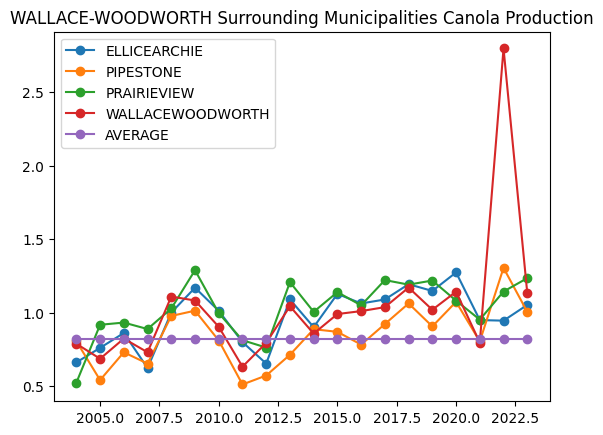

In [232]:
filteredDataFrame.head()
plt.close()
# plot the data into pyplot. This returns the axis
axis = filteredDataFrame.plot(title="{0} Surrounding Municipalities Canola Production".format(selected_municipality), marker = 'o')

#plt.show()
filename = "{0}_Surrounding_Municipalities_Canola_Production.jpg".format(selected_municipality, str(year_value))
plt.savefig(fname=filename)


In [ ]:
# Dropping Unncesseary Columns
df_yield_raw_1=df_yield_raw.drop(columns=['Variety', 'Yield/acre(Metric)', 'Yield/acre(Metric).1', 'Yield/acre(Imperial).1' ])

# Creating new clean yield column
df_yield_raw_1['Yield']=df_yield_raw_1['Yield/acre(Imperial)'].str.replace(' Bushels','')

# Dropping old yield column
df_yield_raw_2=df_yield_raw_1.drop(columns='Yield/acre(Imperial)')

# Removing observations that have not enough values
df_yield_raw_3=df_yield_raw_2.loc[df_yield_raw_2['Farms']!='Below']

In [ ]:
print('Missing Values:', df_yield_raw_3.isna().sum())
print('Duplicated Values:',df_yield_raw_3.duplicated().sum())

In [ ]:
df_yield_raw_3[df_yield_raw_3['Crop']=='ARGENTINE CANOLA']['Yield'].astype('float').plot(kind='hist', bins=300)